In [1]:
import pandas as pd
import rdata

In [96]:
parsed = rdata.parser.parse_file("Lsun3D.rda")
converted = rdata.conversion.convert(parsed)

Y = converted['Lsun3D']['Data']
clrs = converted['Lsun3D']['Cls']


In [3]:
from sklearn.metrics import pairwise_distances
X = pairwise_distances(Y)

In [4]:
from sklearn.manifold import TSNE
import pylab

/home/jacob/anaconda3/envs/gt/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


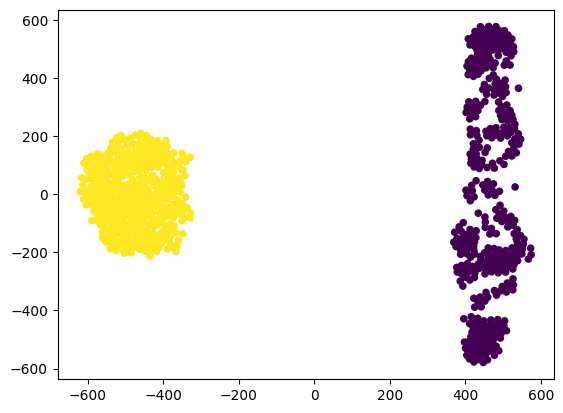

In [5]:
e1 = TSNE(perplexity=60,init='pca',learning_rate='auto').fit_transform(X)
scatter = pylab.scatter(e1[:,0],e1[:,1],20,clrs)

pylab.show()

In [97]:
import plotly.express as px
import pandas as pd
import numpy as np

df = pd.DataFrame(Y,columns=['1','2','3'])
df


,1,2,3
0,3.277701,0.814082,0.326574
1,0.387577,0.176780,0.888046
2,0.268546,0.582963,0.080981
3,2.031145,0.244597,0.643921
4,0.188677,0.461280,0.496633
...,...,...,...
399,3.248655,2.297291,3.388138
400,4.100000,5.100000,0.504558
401,3.900000,4.900000,0.941634
402,4.000000,5.000000,0.702123


In [98]:
fig = px.parallel_coordinates(df, color="1", labels={},
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=np.median(df['1']))
fig.show()

In [106]:
pylab.show()

In [83]:
D = pd.read_csv('food_comp.csv')
X = D.drop(['NDB_No','Shrt_Desc'],axis=1).to_numpy()


d = np.where(np.isnan(X))
X = np.delete(X,d[0],axis=0)

u = X.mean(axis=0)
std = X.std(axis=0)
d = np.where( np.logical_or(X >= u *1.3*std ,X <= u * 1.3 *-std))
X = np.delete(X,d[0],axis=0)
X.shape
X /= X.max(axis=0)

/home/jacob/anaconda3/envs/gt/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/jacob/anaconda3/envs/gt/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



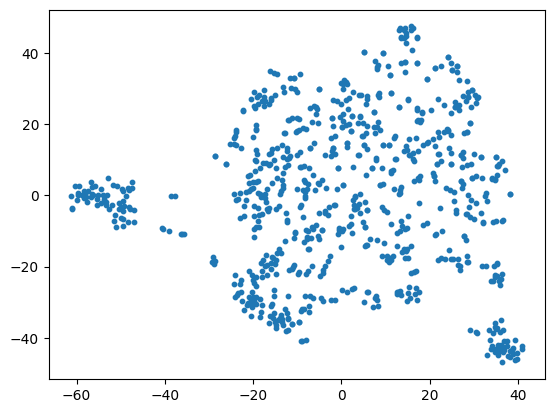

In [86]:
d = pairwise_distances(X)
Y = TSNE(perplexity=20).fit_transform(X)

pylab.scatter(Y[:,0],Y[:,1],10)
pylab.show()

In [163]:
df = pd.read_csv('molecules.csv')
df["log(IGC50-1)"].loc[df["log(IGC50-1)"] <= 0] = 0
df["log(IGC50-1)"].loc[df["log(IGC50-1)"] > 0] = 1
X = df.drop(["mol_id", "log(IGC50-1)"],axis=1).to_numpy()
X = np.delete(X,np.where(X.max(axis=0) == 0)[0],axis=1)
X /= X.max(axis=0)
X.shape


/tmp/ipykernel_116021/1329023850.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_116021/1329023850.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(644, 214)

In [161]:
X.shape

(644, 214)

/home/jacob/anaconda3/envs/gt/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



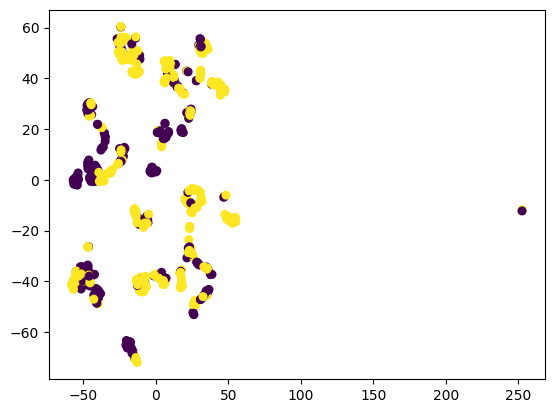

In [164]:
d = pairwise_distances(X)

Y = TSNE(perplexity=10,init='pca',learning_rate='auto').fit_transform(d)

pylab.scatter(Y[:,0],Y[:,1],30,df["log(IGC50-1)"])
pylab.show()

In [170]:
dim1 = np.random.choice(X.shape[1],5)
dim2 = np.random.choice(X.shape[1],5)
x1 = X[:,dim1]
x2 = X[:,dim2]


In [135]:
import mview

In [171]:
mview.mpse_tsne([x1,x2],perplexity=30,
                    sample_colors=df["log(IGC50-1)"],sample_classes=[df["log(IGC50-1)"],df["log(IGC50-1)"]],
                    show_plots=True)

(644, 5)
(644, 5)
len 1
len 1


In [ ]:
for i in range(200):
    dim1 = np.random.choice(X.shape[1],5)
    dim2 = np.random.choice(X.shape[1],5)
    x1 = X[:,dim1]
    x2 = X[:,dim2]

    mview.mpse_tsne([x1,x2],perplexity=30,
                    sample_colors=df["log(IGC50-1)"],sample_classes=[df["log(IGC50-1)"],df["log(IGC50-1)"]],
                    show_plots=True,
                    output="molecules/x1:{},x2:{}.png")